##  Análise Exploratória
Objetivo:
Explorar o conjunto de dados de clientes para entender suas características, identificar padrões, possíveis agrupamentos e relações entre variáveis relevantes — com foco em renda, consumo, campanhas e perfil demográfico.

In [5]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from datetime import datetime
from platform import python_version

# Importações locais 
from src.helpers import inspect_outliers
from src.config import ORIGINAL_DATA, TREATED_DATA
from src.graphics import PALETTE, pairplot

# Configurações visuais e de ambiente
sns.set_theme(palette="ocean")

#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_columns', None)
#configurando pandas para não mostrar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_rows', None)



In [6]:
#carregar dados tratados
df = pd.read_parquet(TREATED_DATA)
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single 58138.00        0         0       58       635   
1  Graduation         Single 46344.00        1         1       38        11   
2  Graduation        Partner 71613.00        0         0       26       426   
3  Graduation        Partner 26646.00        1         0       26        11   
4         PhD        Partner 58293.00        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   57   
1             0             0             0         0         0   60   
2             0             0             0         0         0   49   
3             0             0             0         0         0   30   
4             0             0             0         0         0   33   

   Days_Since_Enrolled  Years_Since_Enrolled Age_Grouped  Mnt_Total  \
0                  663                     1       46-60       1617   
1                  113                     0       46-60         27   
2                  312                     0       46-60        776   
3                  139                     0       18-30         53   
4                  161                     0       31-45        422   

   Mnt_Regular  Children  Has_Children  AcceptedCmpTotal  HasAcceptedCmp  \
0         1529         0             0                 0               0   
1           21         2             1                 0               0   
2          734         0             0                 0               0   
3           48         1             1                 0               0   
4          407         1             1                 0               0   

   NumTotalPurchase  
0                22  
1                 4  
2                20  
3                 6  
4                14

#### 📈 Estatísticas Descritivas
Variáveis Numéricas

Permite entender a distribuição geral: média, mediana, desvio padrão, valores mínimos e máximos, e percentis.


In [7]:
df.describe()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2212.00  2212.00   2212.00  2212.00   2212.00    2212.00   
mean   51958.81     0.44      0.51    49.02    305.29      26.33   
std    21527.28     0.54      0.54    28.94    337.32      39.74   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35233.50     0.00      0.00    24.00     24.00       2.00   
50%    51371.00     0.00      0.00    49.00    175.50       8.00   
75%    68487.00     1.00      1.00    74.00    505.00      33.00   
max   162397.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2212.00          2212.00           2212.00       2212.00   
mean            167.03            37.65             27.05         43.93   
std             224.25            54.77             41.09         51.71   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         24.50   
75%             232.25            50.00             33.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2212.00          2212.00              2212.00   
mean                2.32             4.09                 2.67   
std                 1.92             2.74                 2.93   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2212.00            2212.00       2212.00       2212.00   
mean                5.81               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response     Age  \
count       2212.00       2212.00       2212.00   2212.00   2212.00 2212.00   
mean           0.07          0.06          0.01      0.01      0.15   45.09   
std            0.26          0.25          0.12      0.09      0.36   11.70   
min            0.00          0.00          0.00      0.00      0.00   18.00   
25%            0.00          0.00          0.00      0.00      0.00   37.00   
50%            0.00          0.00          0.00      0.00      0.00   44.00   
75%            0.00          0.00          0.00      0.00      0.00   55.00   
max            1.00          1.00          1.00      1.00      1.00   74.00   

       Days_Since_Enrolled  Years_Since_Enrolled  Mnt_Total  Mnt_Regular  \
count              2212.00               2212.00    2212.00      2212.00   
mean                353.71                  0.48     607.27       563.34   
std                 202.49                  0.50     602.51       576.93   
min                   0.00                  0.00       5.00         4.00   
25%                 180.00                  0.00      69.00        55.75   
50%                 356.00                  0.00     397.00       343.00   
75%                 529.00                  1.00    1048.00       964.00   
max                 699.00                  1.00    2525.00      2491.00   

       Children  Has_Children  AcceptedCmpTotal  Has

Variáveris categóricas 

Oferece visão das colunas categóricas como Education, Marital_Status e Age_Grouped, revelando contagens e categorias predominantes.

In [8]:
df.describe(exclude='number')

Education Marital_Status Age_Grouped
count         2212           2212        2212
unique           5              2           4
top     Graduation        Partner       31-45
freq          1115           1428         964

#### 📊 Pairplot: Análise Multivariada Visual
Seleção das variáveis numéricas consideradas mais representativas para investigar padrões e correlações:

In [9]:
#análise de colunas chave
columns_overview = [
    'Income', 
    'Recency',
    'MntGoldProds', 
    'Age',
    'NumDealsPurchases',
    'Days_Since_Enrolled',	
    'Mnt_Regular', 
    
]


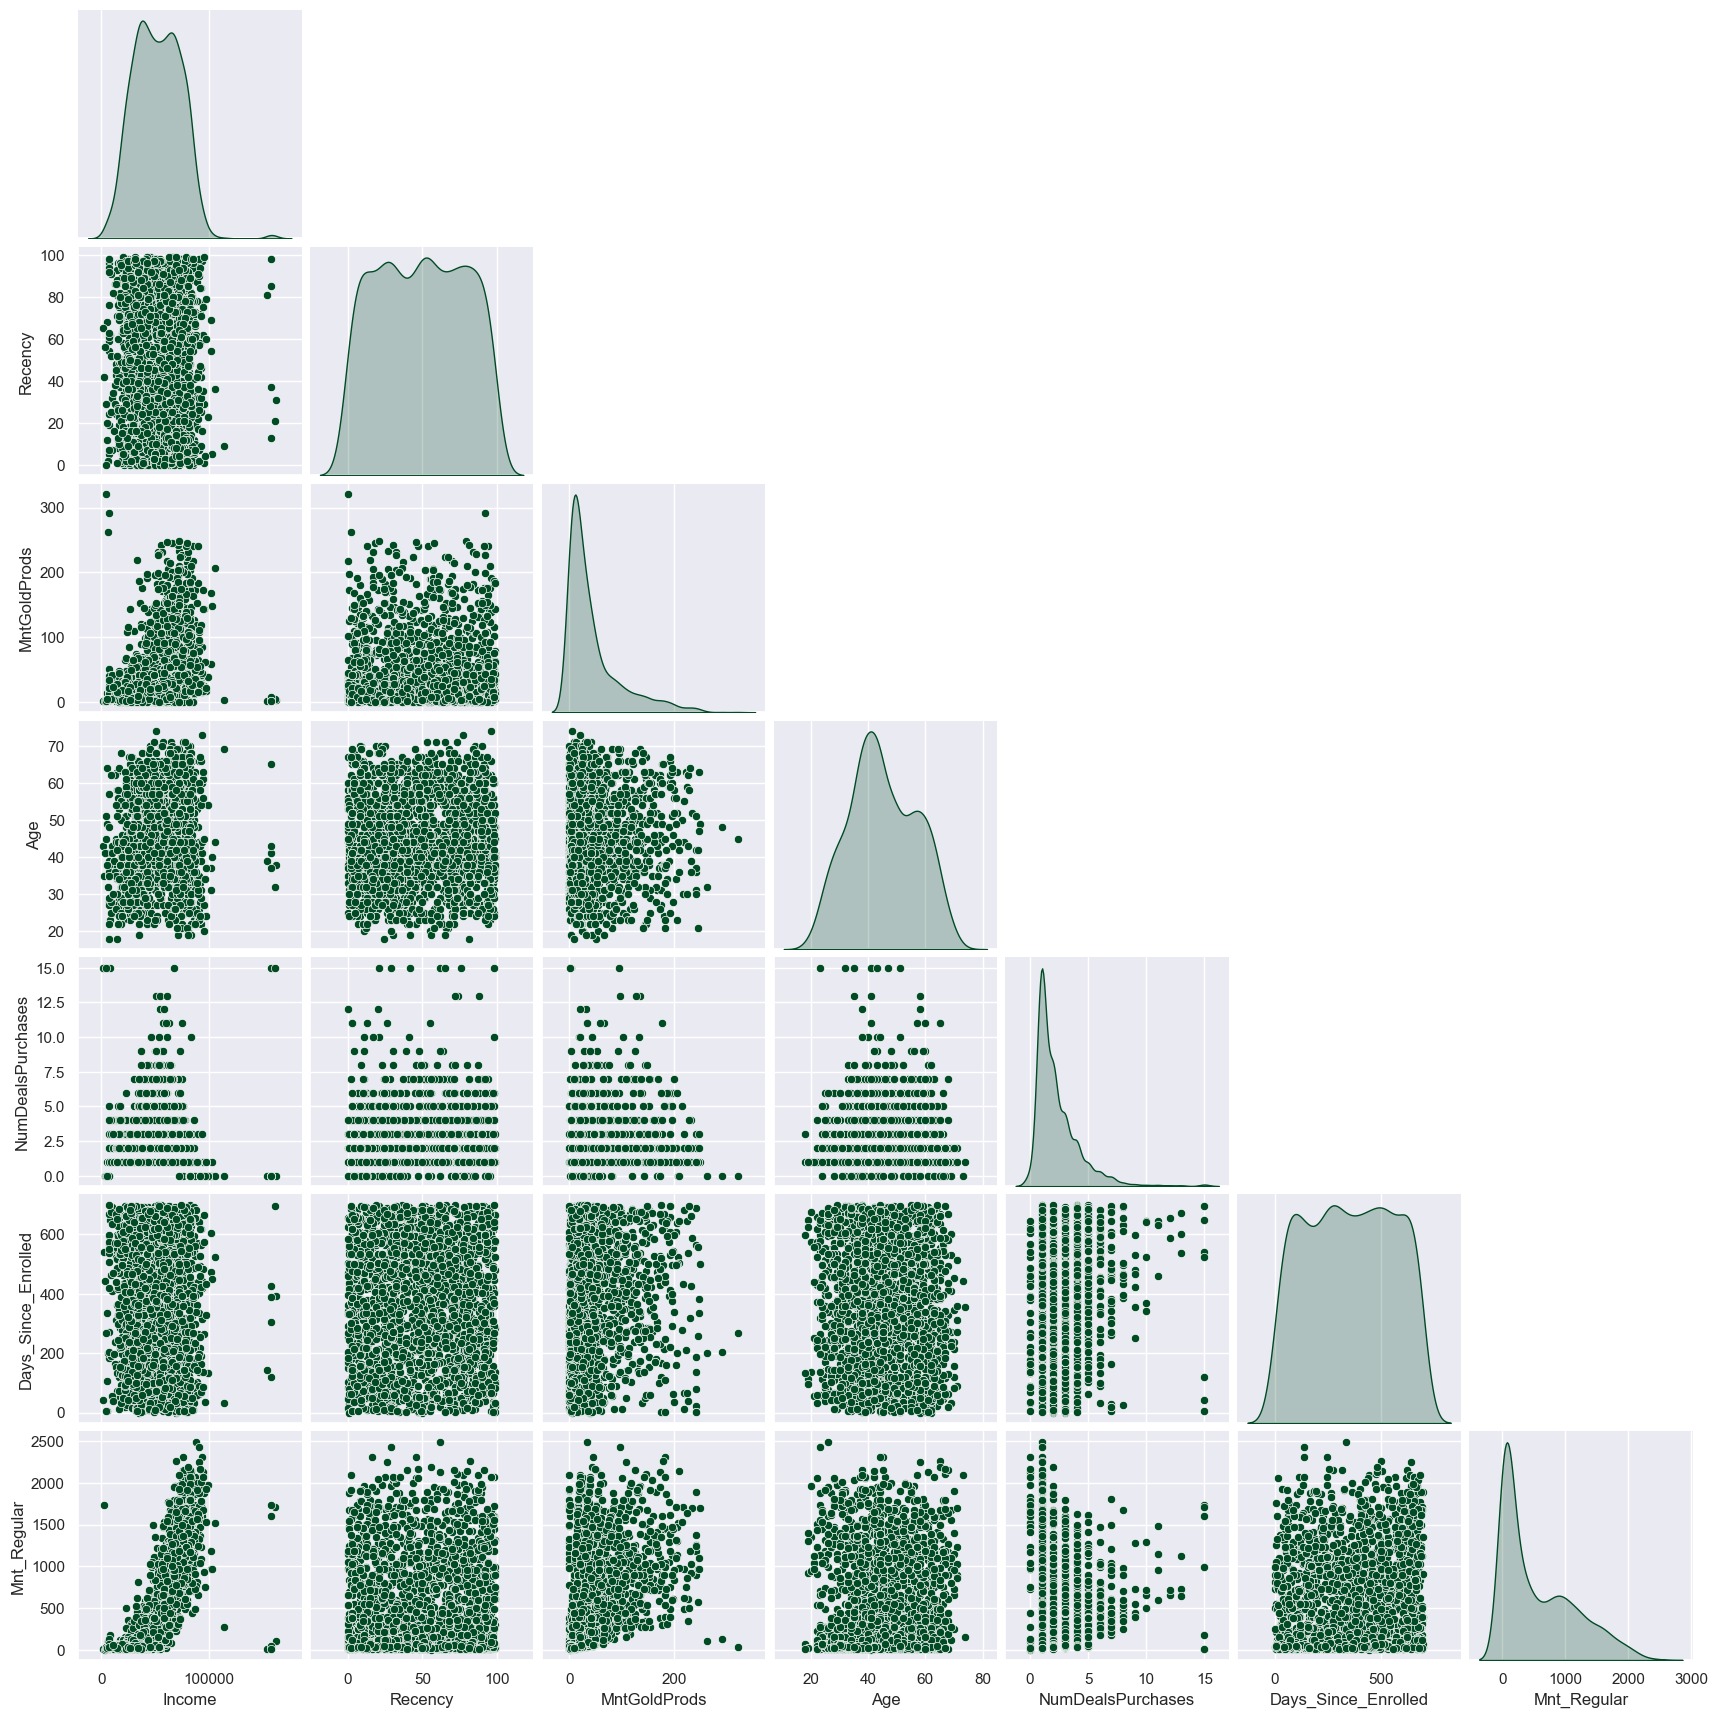

In [10]:
sns.pairplot(df[columns_overview], diag_kind='kde', corner=True)
plt.show()

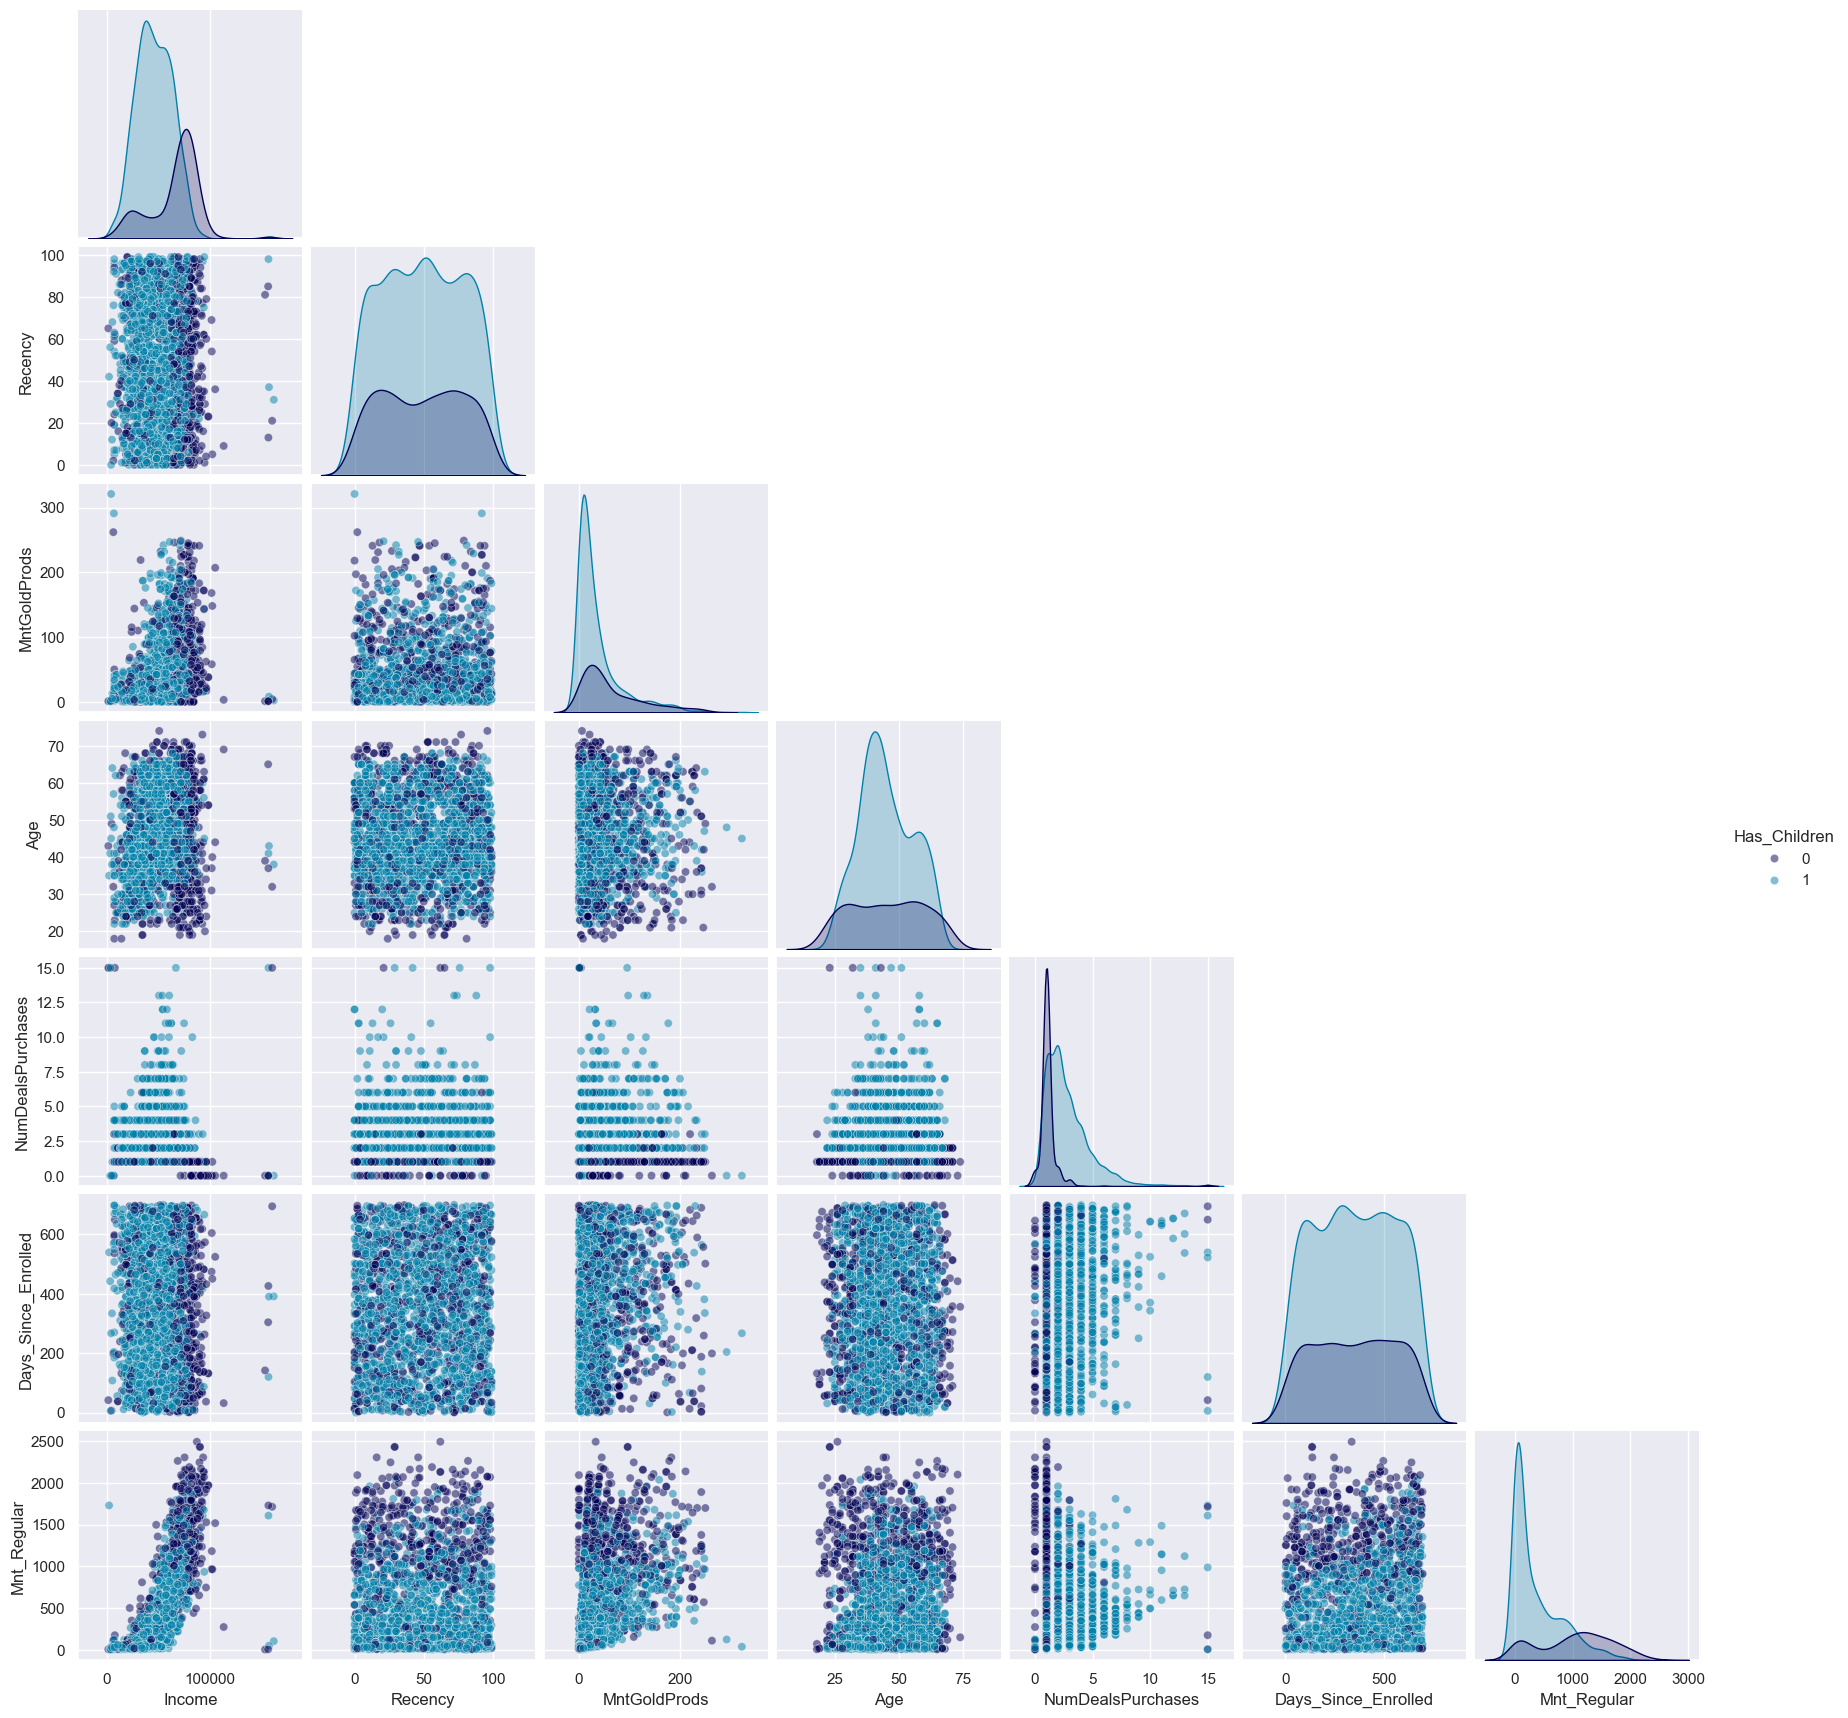

In [11]:
pairplot(df, columns_overview, "Has_Children", palette= 'ocean')

Indica que pessoas sem filhos tendem a ter maior renda e consumo.

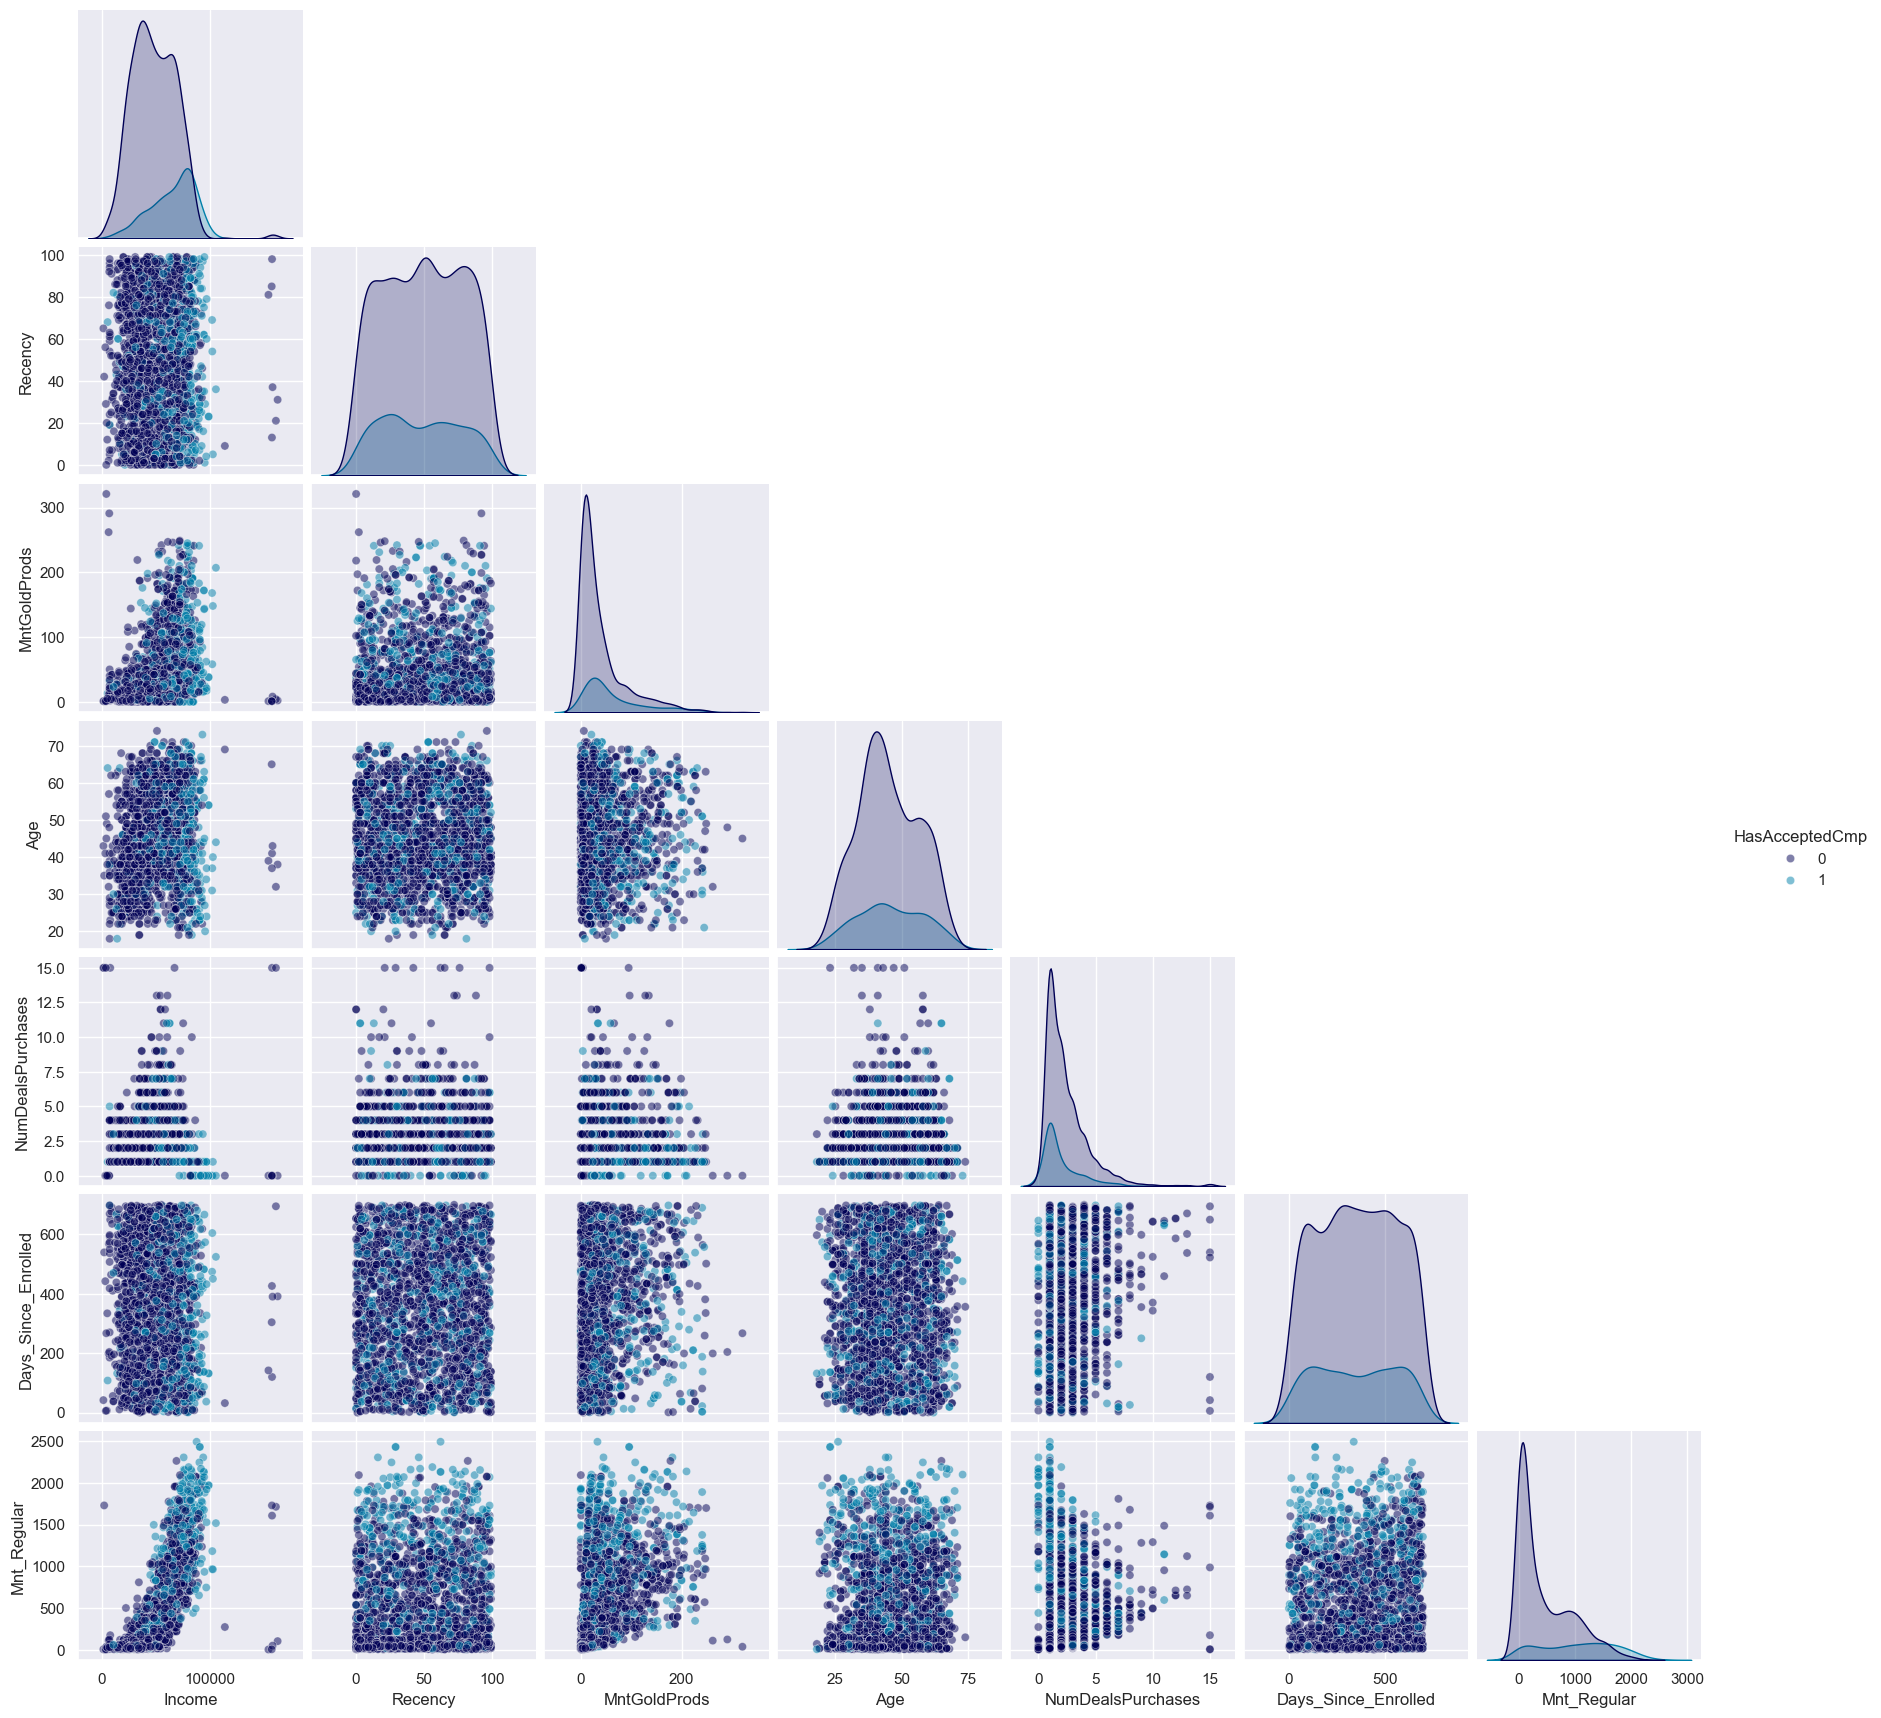

In [12]:
pairplot(df, columns_overview, 'HasAcceptedCmp',  palette= 'ocean') 

Clientes que aceitaram campanhas tendem a ter maior renda e idade entre 30–60 anos.

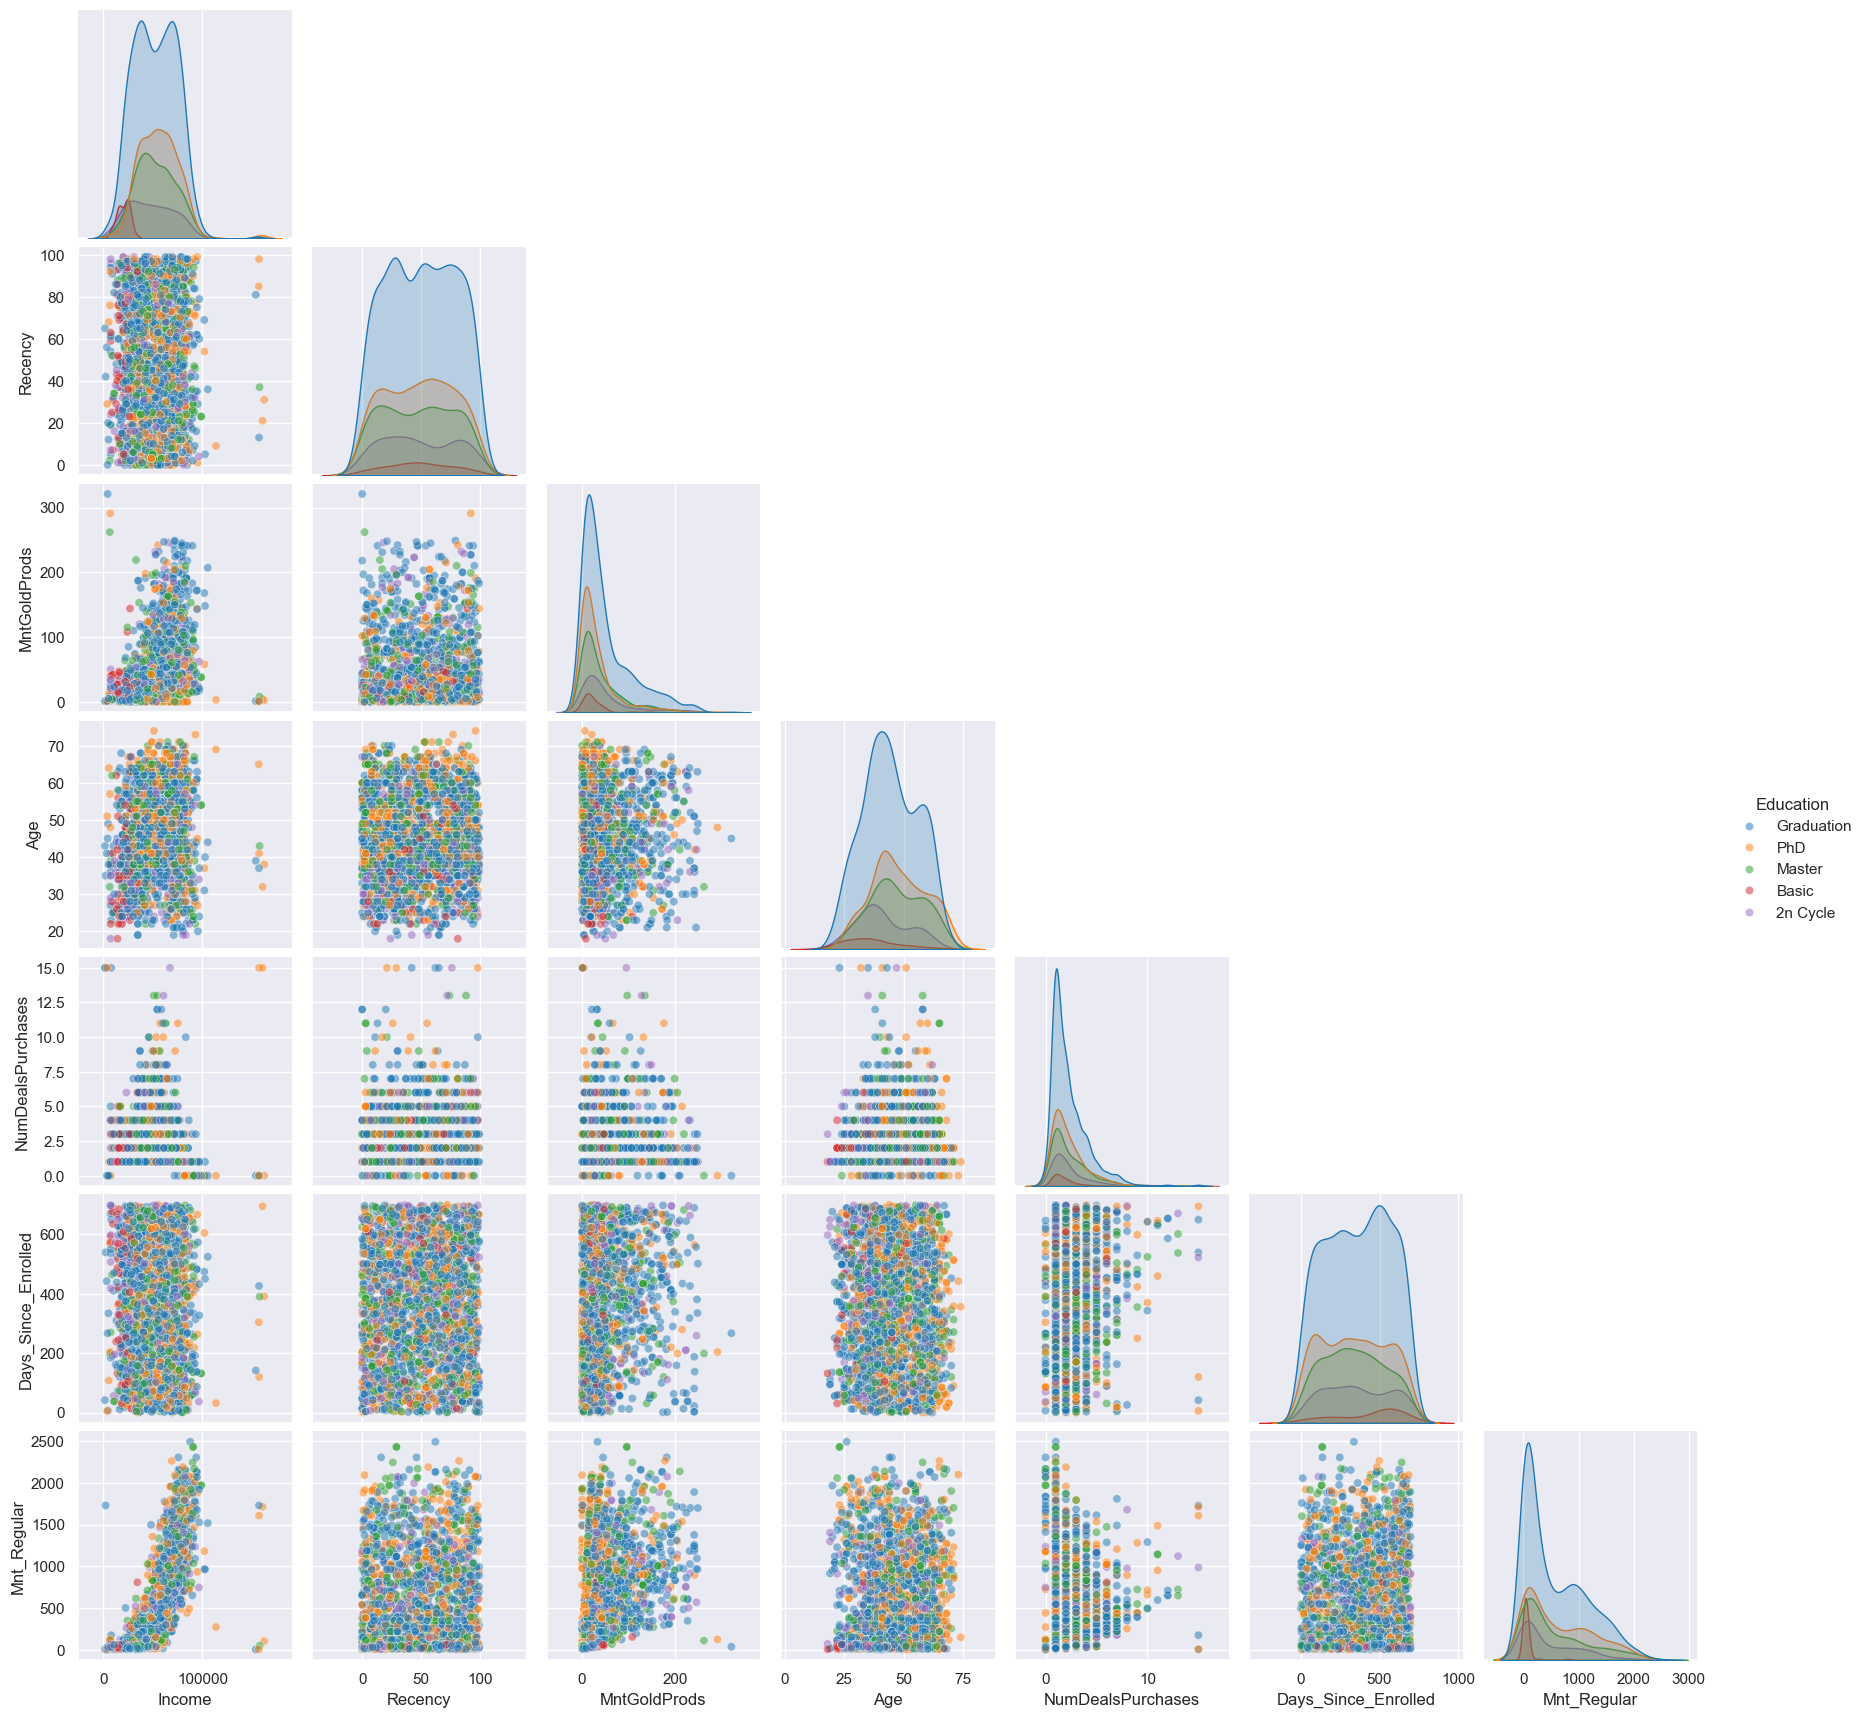

In [13]:
pairplot(df, columns_overview, 'Education') 

Pessoas com nível superior (Graduation, Master, PhD) apresentam maior consumo e renda.

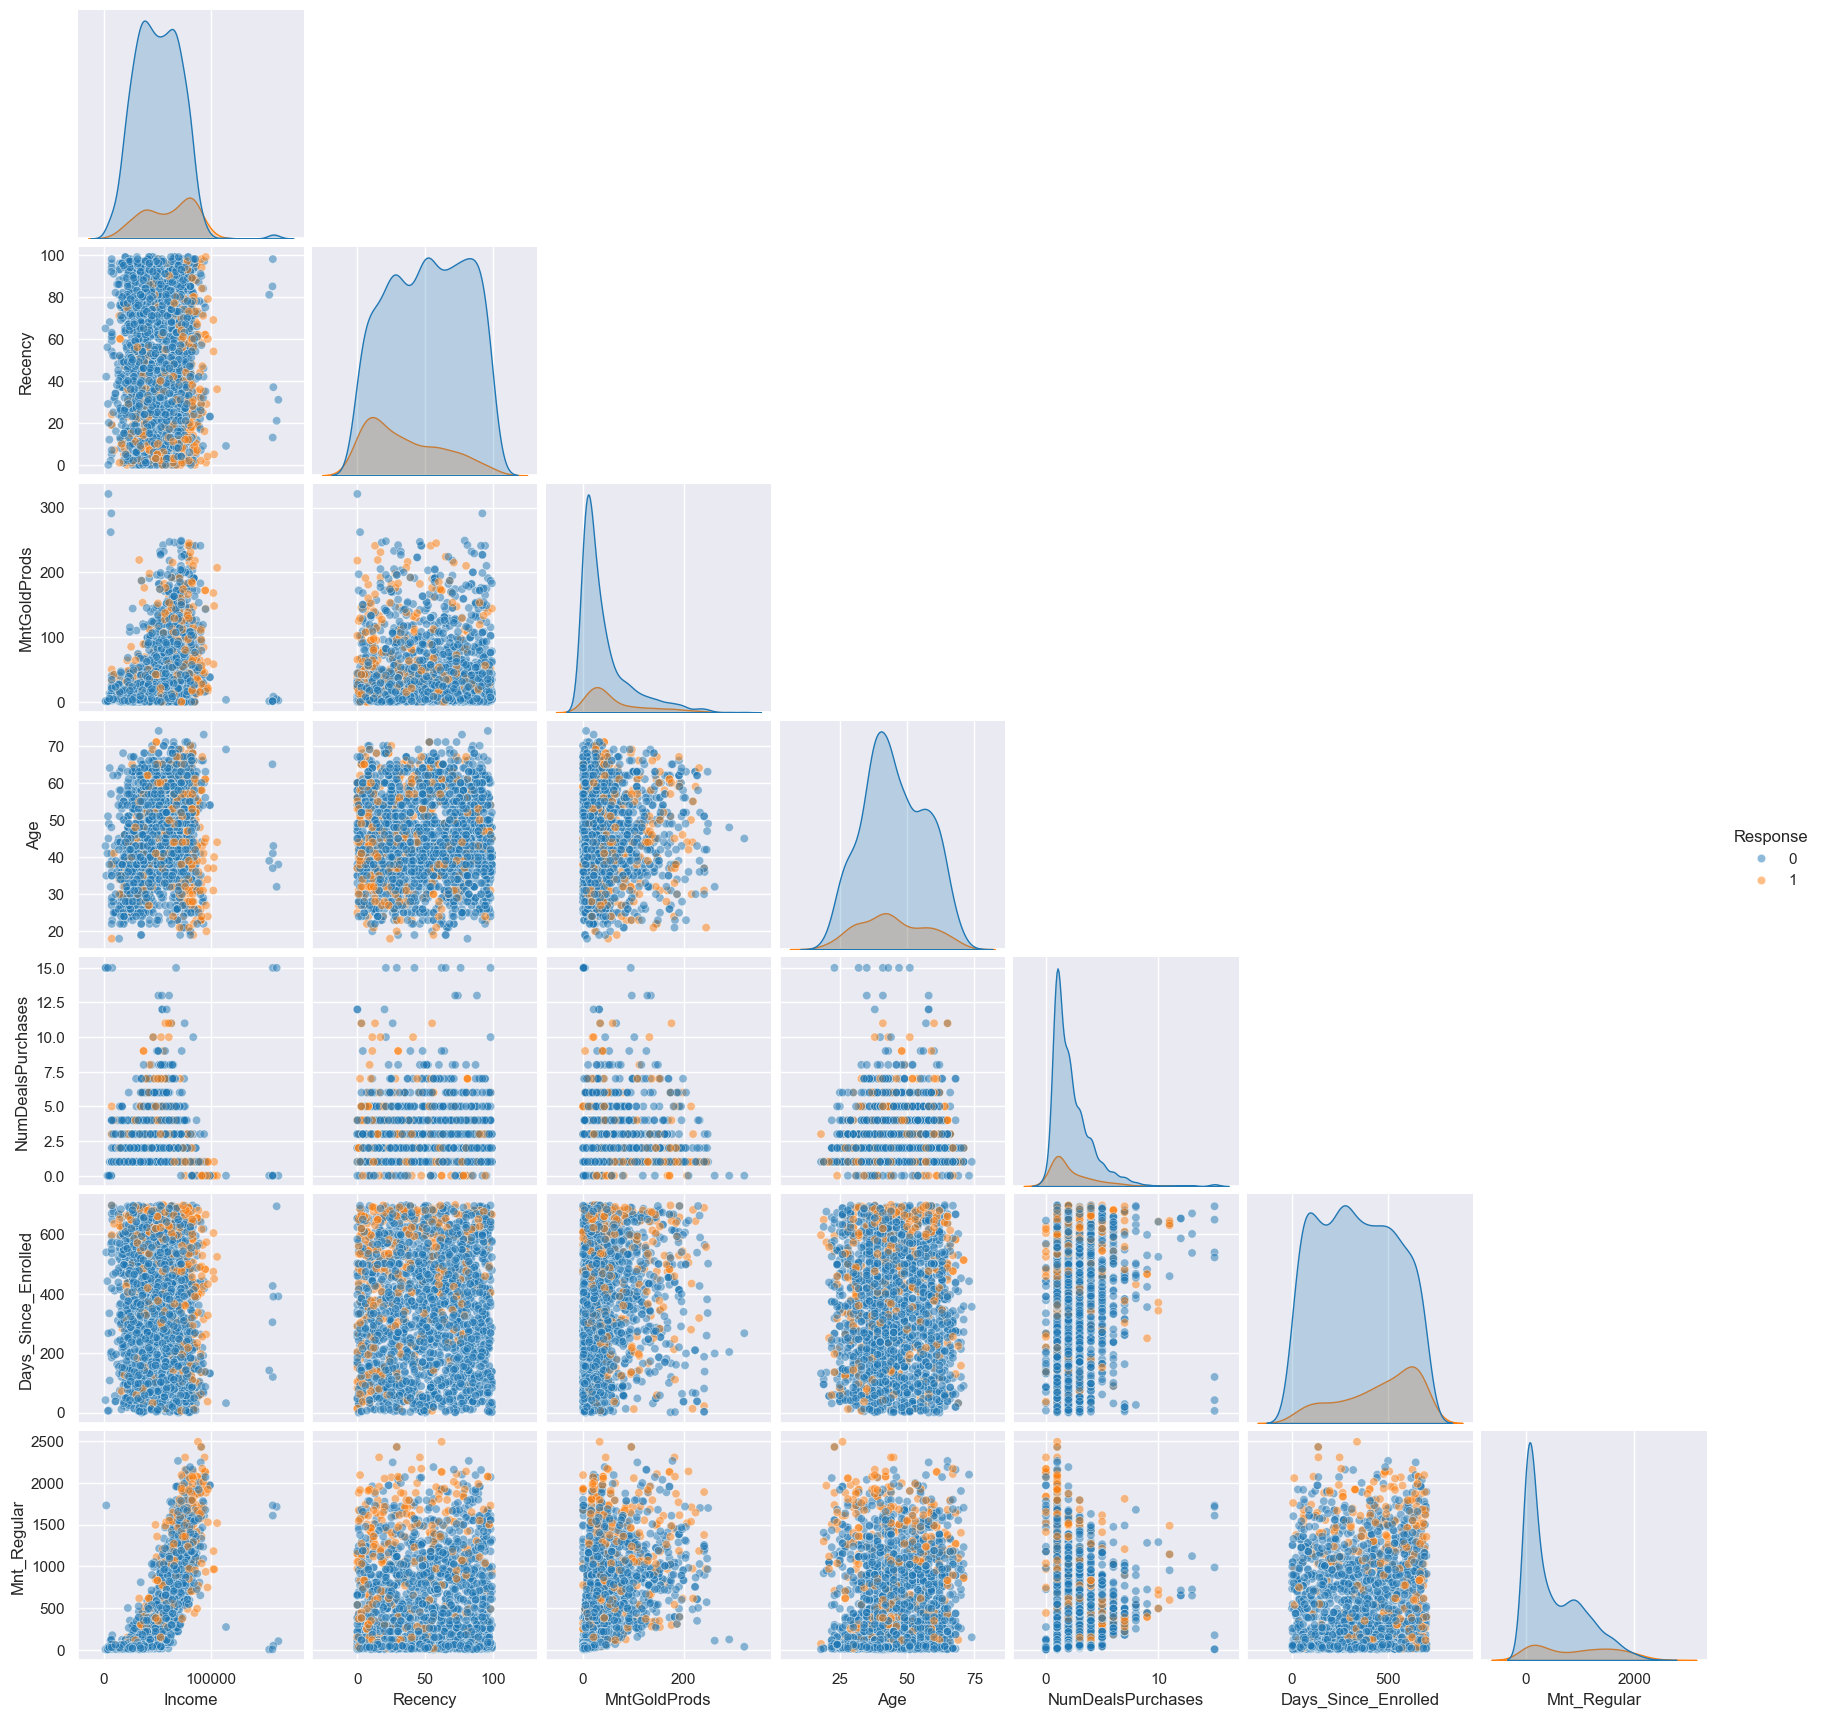

In [14]:
pairplot(df, columns_overview, 'Response') 

Mostra correlação entre resposta positiva a campanhas e variáveis como renda e dias desde inscrição. Também observa-se que clientes com maior recency (tempo desde a última compra) tendem a não responder às campanhas.

#### 📦 Boxplots: Renda vs. Perfil Demográfico

<Axes: xlabel='Education', ylabel='Income'>

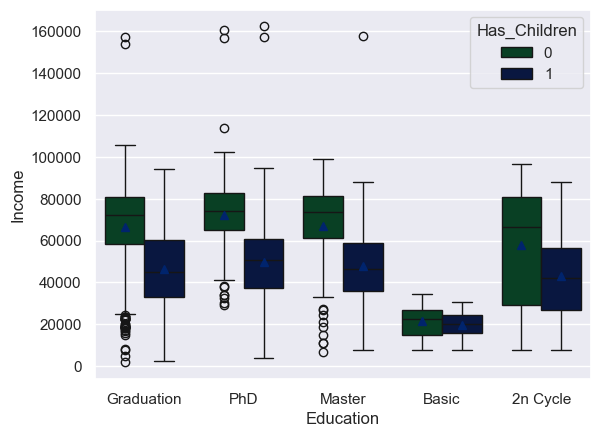

In [16]:
sns.boxplot(data=df, x='Education', y='Income', hue='Has_Children',  showmeans=True)

<Axes: xlabel='Age_Grouped', ylabel='Income'>

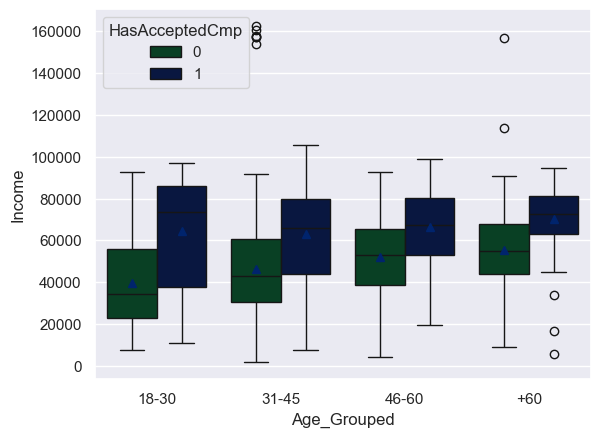

In [17]:
sns.boxplot(x='Age_Grouped', y='Income', hue='HasAcceptedCmp', data=df, showmeans=True)

<Axes: xlabel='Age_Grouped', ylabel='Income'>

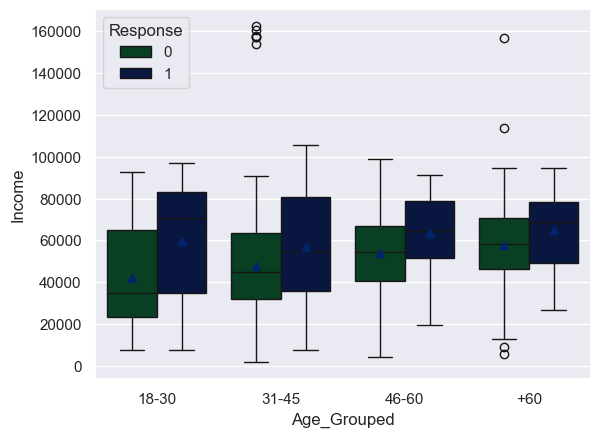

In [18]:
sns.boxplot(x='Age_Grouped', y='Income', hue='Response', data=df, showmeans=True)

Estas análises reforçam os padrões já observados: renda influencia diretamente o consumo e a aceitação de campanhas, especialmente entre os mais instruídos e sem filhos.



#### 🧮 Tabelas de Contingência com Valores Médios

In [19]:
pd.crosstab(
    df['Education'], 
    df['Response'],
    values=df['MntGoldProds'], aggfunc='mean',
    margins=True,
    margins_name='Total'
).style.background_gradient(cmap='RdYlGn').format('{:.1f}')

In [20]:
Confirma que quem respondeu positivamente à campanha apresenta gasto médio maior — principalmente entre os com ensino superior.

In [22]:
pd.crosstab(
    df['Education'], 
    df['Response'],
    values=df['Mnt_Regular'], 
    aggfunc='mean',
    margins=True,
    margins_name='Total'
).style.background_gradient(cmap='RdYlGn').format('{:.1f}')

O padrão se mantém: clientes com maior nível educacional e que responderam positivamente às campanhas apresentaram gastos muito superiores.

In [24]:
pd.crosstab(df['Age_Grouped'], 
            df['HasAcceptedCmp'],
             normalize = 'index' 
           ).style.background_gradient(cmap='RdYlGn').format('{:.2%}')#(cmap = 'RdYlGn', axis = 'columns')

In [25]:
pd.crosstab(df['Has_Children'], 
            df['Response'],
             normalize = 'index' 
           ).style.background_gradient(cmap='RdYlGn').format('{:.2%}')#(cmap = 'RdYlGn', axis = 'columns')

In [26]:
#O grupo de pessoas que não tem filhos reagiu significamente mais a campanha piloto

In [27]:
pd.crosstab(
    df['Education'], 
    df['Response'],
    values=df['Mnt_Regular'], 
    aggfunc='mean',
    margins=True,
    margins_name='Total'
).style.background_gradient(cmap='RdYlGn').format('{:.1f}')

#### 📊 Histogramas

Mostrar em detalhe a distribuição dos dados.

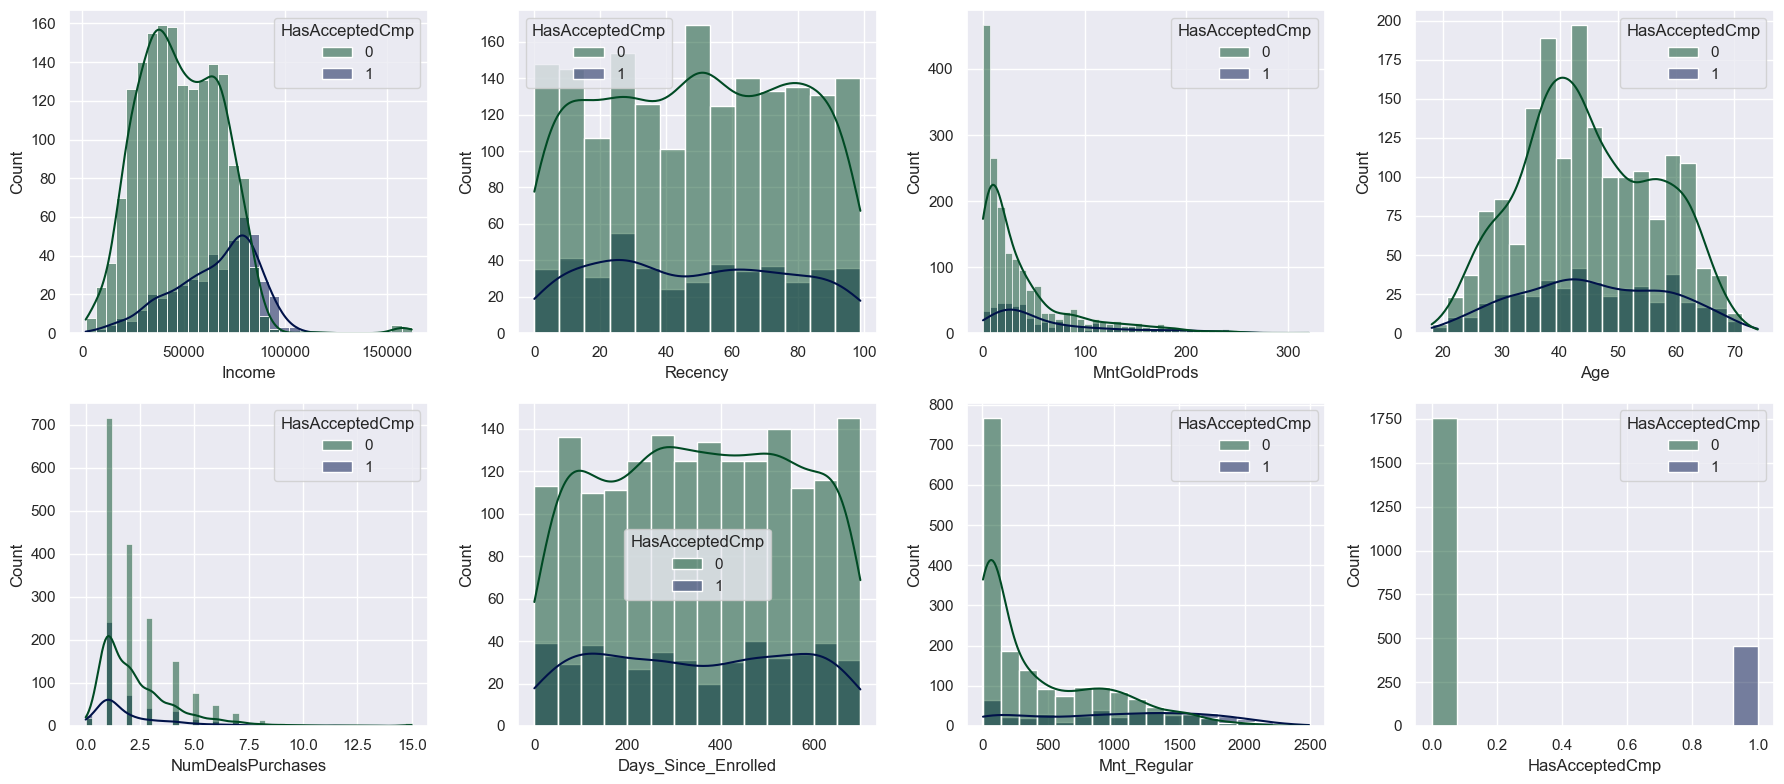

In [28]:
#análise de colunas chave
columns_hist = [
    'Income', 
    'Recency',
    'MntGoldProds', 
    'Age',
    'NumDealsPurchases',
    'Days_Since_Enrolled',	
    'Mnt_Regular', 
    'HasAcceptedCmp'
    
]
#Histograma complementa a análise do pairplot, mostrando em detalhe a distrivuição dos dados
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

for ax, coluna in zip(axs.flatten(), df[columns_hist]):
    sns.histplot(x=coluna, ax=ax, data=df[columns_hist], kde=True, hue='HasAcceptedCmp')

plt.tight_layout()
plt.show()



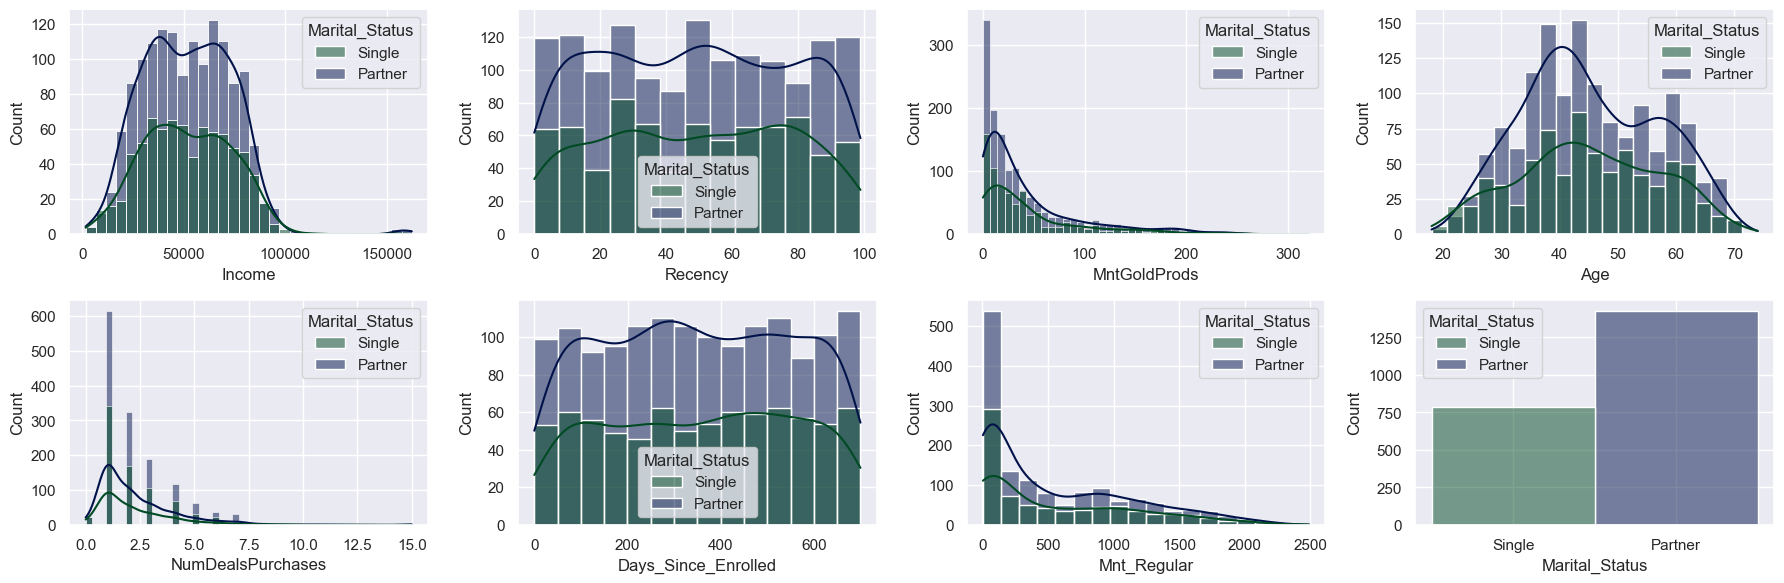

In [29]:
#análise de colunas chave
columns_hist = [
    'Income', 
    'Recency',
    'MntGoldProds', 
    'Age',
    'NumDealsPurchases',
    'Days_Since_Enrolled',	
    'Mnt_Regular', 
    'Marital_Status'
    
]
#Histograma complementa a análise do pairplot, mostrando em detalhe a distrivuição dos dados
fig, axs = plt.subplots(2, 4, figsize=(18, 6))

for ax, coluna in zip(axs.flatten(), df[columns_hist]):
    sns.histplot(x=coluna, ax=ax, data=df[columns_hist], kde=True, hue='Marital_Status')

plt.tight_layout()
plt.show()



In [ ]:
As features Income e Age apresentam distribuições próximas ao normal, já Recency e Days Since Enrolled trazem distribuições homogêneas

In [30]:
#análise de colunas chave
columns_corr = [
    'Income', 
    'Recency',
    'MntGoldProds', 
    'Age',
    'NumDealsPurchases',
    'Days_Since_Enrolled',	
    'Mnt_Regular', 
    'Response',
    'HasAcceptedCmp',
    'Has_Children',
    
]


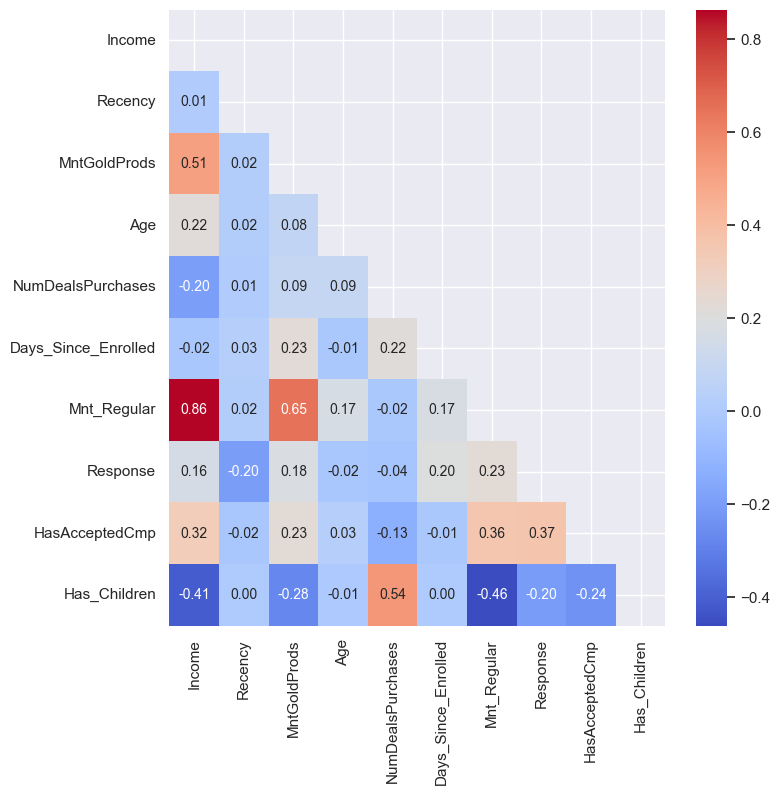

In [31]:
#analisar correlação entre as colunas
matriz = np.triu(df[columns_corr].corr(method="spearman"))

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    df[columns_corr].corr("spearman"),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 10}
)

plt.show()

O gráfico de correlação confirma  a correlação negativa entre o número de dias entre a última compra e response.
Também confirma a relação positiva ainda que fraca entre 'Se o cliente aceitou a oferta de alguma campanha e Renda, Gastos com produtos regulares e response.
A correlação negativa para o grupo de pessoas que têm filhos em relação aos gastos com produtos regulares, gold e aceite de ofertas de capanhas também fica evidente.

In [32]:
df_dummies = pd.get_dummies(df)
df_dummies_corr = df_dummies.corr()

In [33]:
df_dummies_corr_unstack = pd.DataFrame(df_dummies_corr.unstack())
df_dummies_corr_unstack = df_dummies_corr_unstack.rename(columns={0:'corr'})
df_dummies_corr_unstack.head()

corr
Income Income    1.00
       Kidhome  -0.51
       Teenhome  0.03
       Recency   0.01
       MntWines  0.69

In [34]:
df_dummies_corr_unstack.loc['Response'].sort_values(by='corr')

corr
Has_Children           -0.20
Recency                -0.20
Children               -0.17
Teenhome               -0.15
Marital_Status_Partner -0.15
Kidhome                -0.08
Education_Basic        -0.05
Education_Graduation   -0.04
Age_Grouped_46-60      -0.04
Education_2n Cycle     -0.03
Age                    -0.02
NumWebVisitsMonth      -0.00
Complain               -0.00
NumDealsPurchases       0.00
Education_Master        0.00
Age_Grouped_+60         0.01
Age_Grouped_31-45       0.01
Age_Grouped_18-30       0.03
NumStorePurchases       0.04
Education_PhD           0.09
MntFishProducts         0.11
MntSweetProducts        0.12
MntFruits               0.12
MntGoldProds            0.14
Marital_Status_Single   0.15
NumWebPurchases         0.15
Income                  0.16
NumTotalPurchase        0.16
AcceptedCmp2            0.17
Years_Since_Enrolled    0.17
AcceptedCmp4            0.18
Days_Since_Enrolled     0.20
NumCatalogPurchases     0.22
MntMeatProducts         0.24
MntWines                0.25
AcceptedCmp3            0.25
Mnt_Regular             0.26
Mnt_Total               0.26
AcceptedCmp1            0.30
AcceptedCmp5            0.32
HasAcceptedCmp          0.37
AcceptedCmpTotal        0.43
Response                1.00

In [35]:
df_dummies_corr_unstack.loc['HasAcceptedCmp'].sort_values(by='corr')


corr
Has_Children           -0.24
Children               -0.22
Kidhome                -0.20
NumWebVisitsMonth      -0.13
Teenhome               -0.10
NumDealsPurchases      -0.09
Age_Grouped_31-45      -0.04
Education_Basic        -0.04
Complain               -0.03
Recency                -0.02
Education_2n Cycle     -0.02
Days_Since_Enrolled    -0.01
Education_Graduation   -0.01
Years_Since_Enrolled   -0.01
Education_Master       -0.00
Marital_Status_Partner -0.00
Marital_Status_Single   0.00
Age_Grouped_18-30       0.01
Age_Grouped_46-60       0.02
Age_Grouped_+60         0.03
Age                     0.03
Education_PhD           0.04
MntFruits               0.13
MntSweetProducts        0.16
MntFishProducts         0.16
NumStorePurchases       0.19
MntGoldProds            0.19
NumWebPurchases         0.21
AcceptedCmp2            0.23
MntMeatProducts         0.27
NumTotalPurchase        0.29
NumCatalogPurchases     0.31
Income                  0.31
Response                0.37
Mnt_Total               0.41
Mnt_Regular             0.41
MntWines                0.46
AcceptedCmp1            0.51
AcceptedCmp5            0.55
AcceptedCmp3            0.55
AcceptedCmp4            0.55
AcceptedCmpTotal        0.86
HasAcceptedCmp          1.00

In [36]:
df_dummies_corr_unstack.loc['Mnt_Total'].sort_values(by='corr')

corr
Kidhome                -0.56
Has_Children           -0.52
Children               -0.50
NumWebVisitsMonth      -0.50
Education_Basic        -0.14
Teenhome               -0.14
Age_Grouped_31-45      -0.10
NumDealsPurchases      -0.07
Education_2n Cycle     -0.06
Complain               -0.03
Marital_Status_Partner -0.02
Age_Grouped_18-30      -0.02
Education_Master        0.00
Recency                 0.02
Marital_Status_Single   0.02
Education_Graduation    0.02
AcceptedCmp3            0.05
Age_Grouped_46-60       0.06
Education_PhD           0.06
Age_Grouped_+60         0.09
Age                     0.12
AcceptedCmp2            0.14
Years_Since_Enrolled    0.15
Days_Since_Enrolled     0.16
AcceptedCmp4            0.25
Response                0.26
AcceptedCmp1            0.38
HasAcceptedCmp          0.41
AcceptedCmpTotal        0.46
AcceptedCmp5            0.47
MntGoldProds            0.53
NumWebPurchases         0.53
MntSweetProducts        0.61
MntFruits               0.61
MntFishProducts         0.64
NumStorePurchases       0.68
NumCatalogPurchases     0.78
Income                  0.79
NumTotalPurchase        0.82
MntMeatProducts         0.85
MntWines                0.89
Mnt_Regular             1.00
Mnt_Total               1.00

In [37]:
df_dummies_corr_unstack.loc['Income'].sort_values(by='corr')

corr
NumWebVisitsMonth      -0.65
Kidhome                -0.51
Has_Children           -0.40
Children               -0.34
Education_Basic        -0.23
Age_Grouped_18-30      -0.11
NumDealsPurchases      -0.11
Age_Grouped_31-45      -0.11
Education_2n Cycle     -0.06
Complain               -0.03
Days_Since_Enrolled    -0.02
AcceptedCmp3           -0.02
Marital_Status_Partner -0.00
Years_Since_Enrolled    0.00
Marital_Status_Single   0.00
Recency                 0.01
Education_Graduation    0.01
Education_Master        0.02
Teenhome                0.03
Education_PhD           0.10
AcceptedCmp2            0.10
Age_Grouped_46-60       0.11
Age_Grouped_+60         0.12
Response                0.16
Age                     0.20
AcceptedCmp4            0.22
HasAcceptedCmp          0.31
AcceptedCmp1            0.33
AcceptedCmpTotal        0.37
MntGoldProds            0.39
AcceptedCmp5            0.40
NumWebPurchases         0.46
MntFruits               0.51
MntFishProducts         0.52
MntSweetProducts        0.52
NumStorePurchases       0.63
MntWines                0.69
MntMeatProducts         0.69
NumCatalogPurchases     0.70
NumTotalPurchase        0.74
Mnt_Total               0.79
Mnt_Regular             0.79
Income                  1.00

A relação negativa entre presença de crianças e visitas ao site destaca-se tanto em relação aos gastos totais, quanto ao aceite de ofertas de campanhas e aceite da campanha piloto.
Confirma-se a relação positiva entre gastos totais, gastos com pordutos regulares, renda, aceite de ofertas de campanhas.
Foi possível perceber a relação positiva entre gastos com vinhos e gastos totais e aceites de ofertas de campanhas.

In [38]:
#retirar a relação da feature com ela mesma, pora o gráfico
response_corr = df_dummies_corr_unstack.loc['Response'].sort_values(by='corr')[:-1]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22196\985123971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=PALETTE)


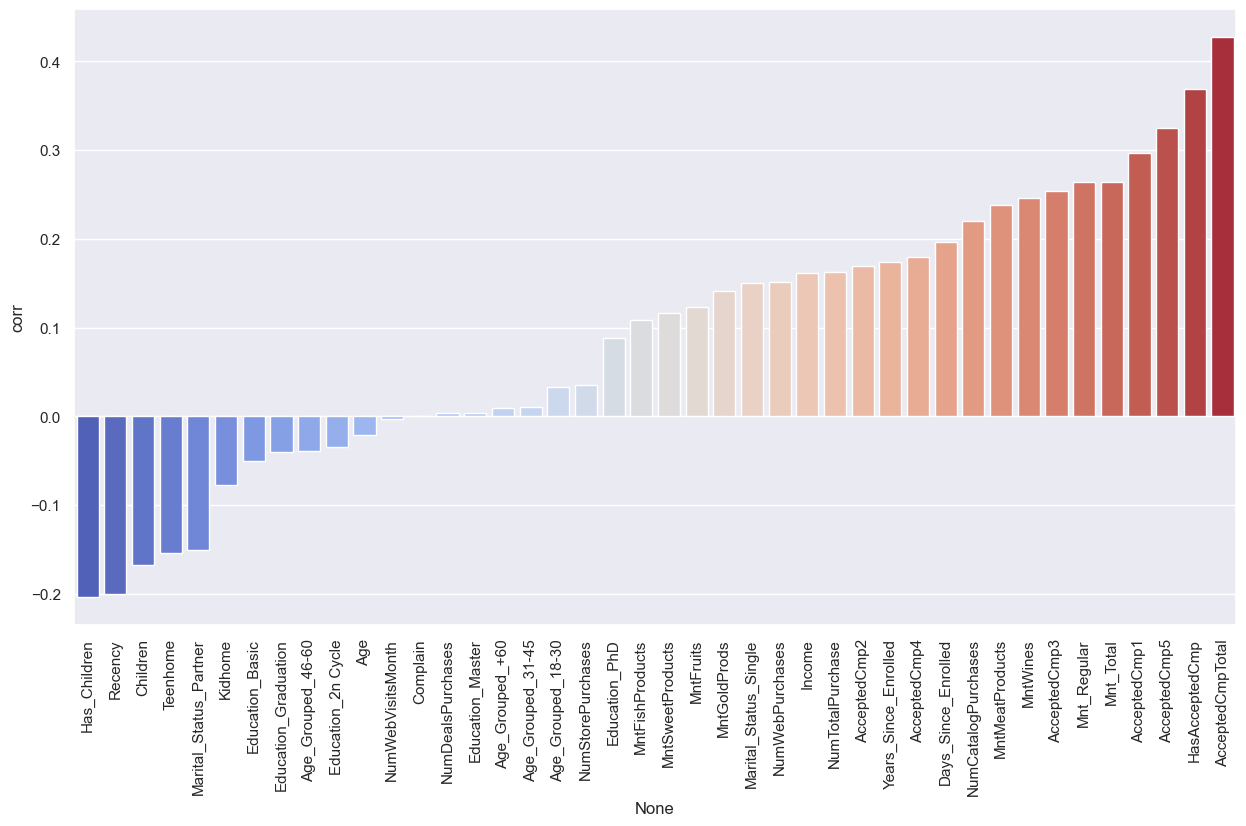

In [39]:
fig, ax = plt.subplots(figsize = (15,8))
b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=PALETTE)
b.tick_params(axis='x', rotation=90)
plt.show()

In [40]:
#para alinhar o mapa de cores
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

cmap = 'coolwarm_r'
cnorm=CenteredNorm(vcenter=0, halfrange=0.42)
smap=ScalarMappable(norm=cnorm, cmap=cmap)

listed_colors = ListedColormap([smap.to_rgba(x) for x in response_corr['corr']]).colors



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22196\2823901834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=listed_colors)


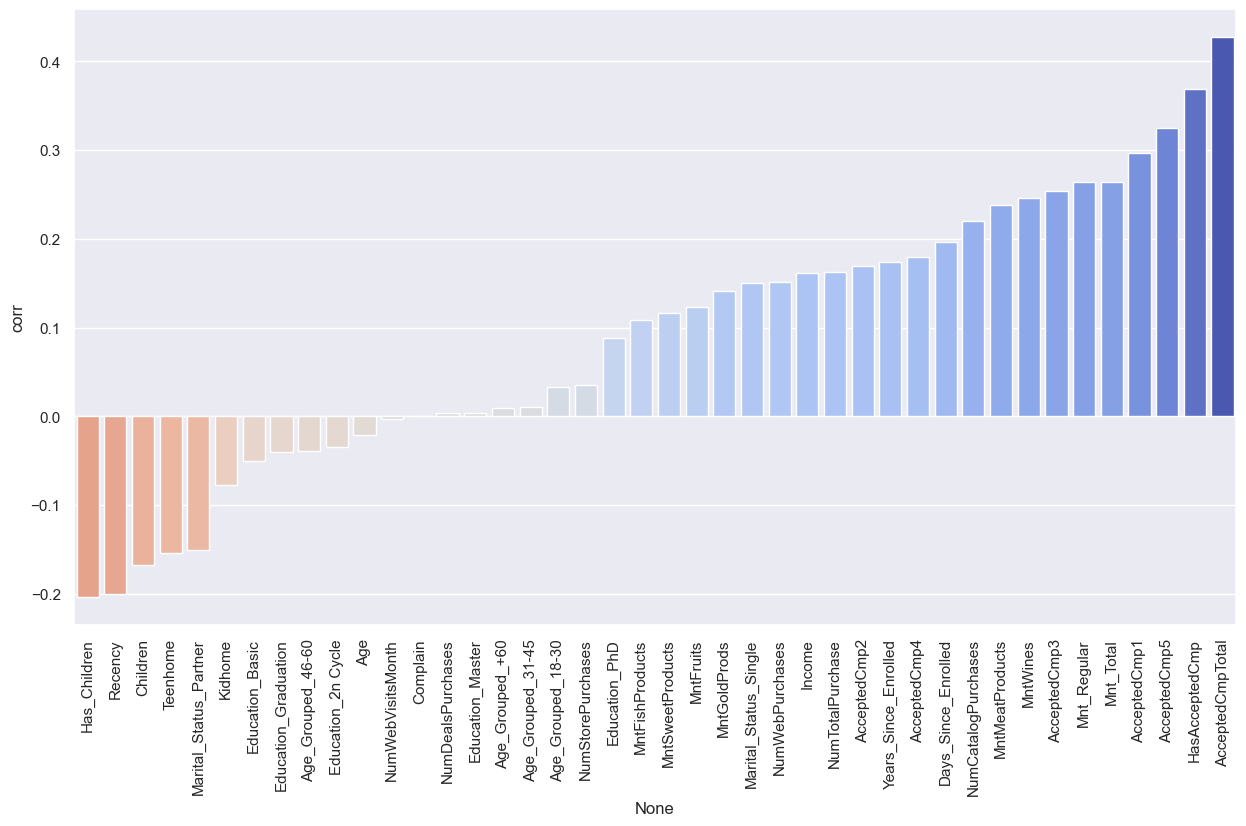

In [41]:
fig, ax = plt.subplots(figsize = (15,8))
b = sns.barplot(x=response_corr.index, y=response_corr['corr'], palette=listed_colors)
b.tick_params(axis='x', rotation=90)
plt.show()

## 📌Conclusões - Análise Exploratória (EDA)

* Pessoas com maior renda e instrução demonstram maior propensão ao consumo e resposta positiva às campanhas.

* O grupo de clientes sem filhos também tende a consumir mais e responder melhor.

* A variável Recency está inversamente relacionada à aceitação das campanhas — quanto mais recente a última compra, maior a chance de engajamento.

* Há evidências claras para segmentação de público baseada em perfil educacional, familiar e histórico de compra.


#### Distribuições

* As features Income e Age apresentam distribuições próximas ao normal, já Recency e Days Since Enrolled trazem distribuições homogêneas